# 실습 : 주식시장 분석 project

- 2012-1-1 ~ 2019-8-31 기간의 Tesla, 삼성전자, Apple 의 주가 등락, 변동성, 수익률 비교  


In [3]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#한글 폰트 사용
import matplotlib
from matplotlib import font_manager
font_path = "C:/Windows/Fonts/H2GTRM.TTF"                       #폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()  #폰트 이름 얻어오기
matplotlib.rc('font', family=font_name)                                  #font 지정
matplotlib.rcParams['axes.unicode_minus'] = False               #한글사용시 마이너스 사인 깨짐 방지

In [5]:
!pip install yfinance

  Stored in directory: C:\Users\trimu\AppData\Local\pip\Cache\wheels\f9\e3\5b\ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [6]:
import yfinance as yf

## yfinance 를 이용한 주가 data 가져오기

In [12]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 8, 31)

tesla_t = yf.Ticker('TSLA')
tesla = tesla_t.history(start=start, end=end)
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928100,0,0
2012-01-04,28.21,28.67,27.50,27.71,630100,0,0
2012-01-05,27.76,27.93,26.85,27.12,1005500,0,0
2012-01-06,27.20,27.79,26.41,26.91,986300,0,0
2012-01-09,27.00,27.49,26.12,27.25,897000,0,0


In [13]:
apple_t = yf.Ticker('AAPL')
apple = apple_t.history(start=start, end=end)
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,50.77,51.15,50.72,50.99,75555200,0.0,0.0
2012-01-04,50.84,51.42,50.75,51.27,65005500,0.0,0.0
2012-01-05,51.46,51.90,51.17,51.84,67817400,0.0,0.0
2012-01-06,52.05,52.42,51.99,52.38,79573200,0.0,0.0
2012-01-09,52.76,53.04,52.25,52.30,98506100,0.0,0.0


In [14]:
ford_t = yf.Ticker("F")
ford = ford_t.history(start=start, end=end)
ford.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,7.7319,7.9076,7.7248,7.8233,45709900,0.0,0
2012-01-04,7.8373,8.1044,7.7811,7.9427,79725200,0.0,0
2012-01-05,7.9638,8.1747,7.9006,8.1466,67877500,0.0,0
2012-01-06,8.2520,8.2942,8.0974,8.2309,59840700,0.0,0
2012-01-09,8.3153,8.3996,8.2239,8.2942,53981500,0.0,0


## 주가 추이 시각화

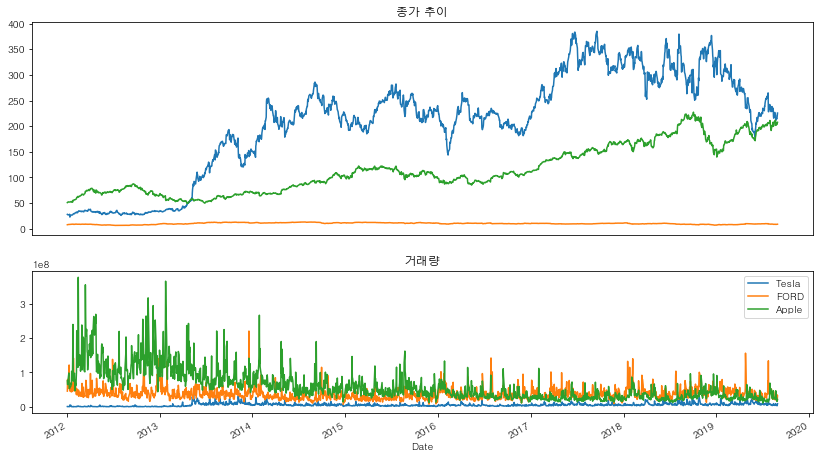

In [15]:
from matplotlib import gridspec

fig= plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2]) 

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1]))
axes[0].get_xaxis().set_visible(False)

tesla['Close'].plot(ax=axes[0], label='Tesla', figsize=(14, 8), title="종가 추이")
ford['Close'].plot(ax=axes[0], label='FORD')
apple['Close'].plot(ax=axes[0], label='Apple')
tesla['Volume'].plot(ax=axes[1], label='Tesla', figsize=(14, 8), title="거래량")
ford['Volume'].plot(ax=axes[1], label='FORD')
apple['Volume'].plot(ax=axes[1], label='Apple')
plt.legend();

**Apple 의 최대 거래량 일자**

In [22]:
apple.index[apple['Volume'].argmax()]

Timestamp('2012-02-15 00:00:00')

## Log Close Price
- 서로 scale 이 다른 주가에 대한 실제 변화율을 시각화 하기 위해 price 의 log 를 취함

In [25]:
tesla['log close'] = np.log(tesla['Close'])
ford['log close'] = np.log(ford['Close'])
apple['log close'] = np.log(apple['Close'])

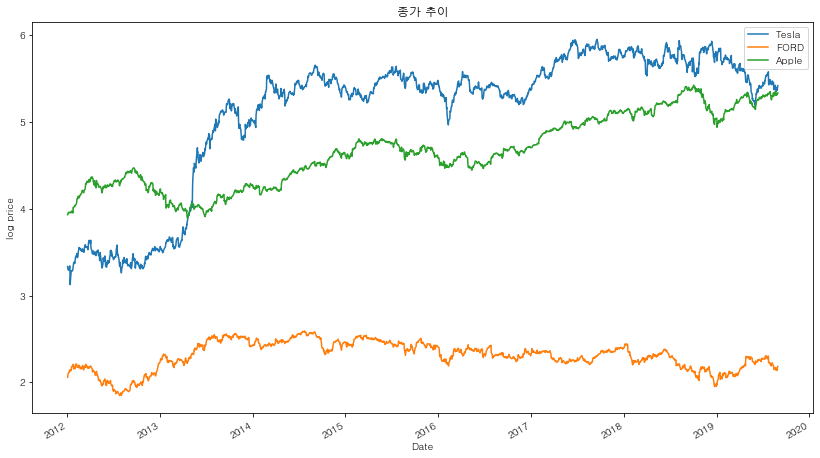

In [26]:
fig= plt.figure(figsize=(10, 8))
ax1 = plt.subplot()

tesla['log close'].plot(ax=ax1, label='Tesla', figsize=(14, 8), title="종가 추이")
ford['log close'].plot(ax=ax1, label='FORD')
apple['log close'].plot(ax=ax1, label='Apple')
plt.ylabel('log price')
plt.legend();

## Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [27]:
tesla['norm close'] = tesla['Close'] / tesla['Close'][0] 
ford['norm close'] = ford['Close'] / ford['Close'][0]
apple['norm close'] = apple['Close'] / apple['Close'][0]

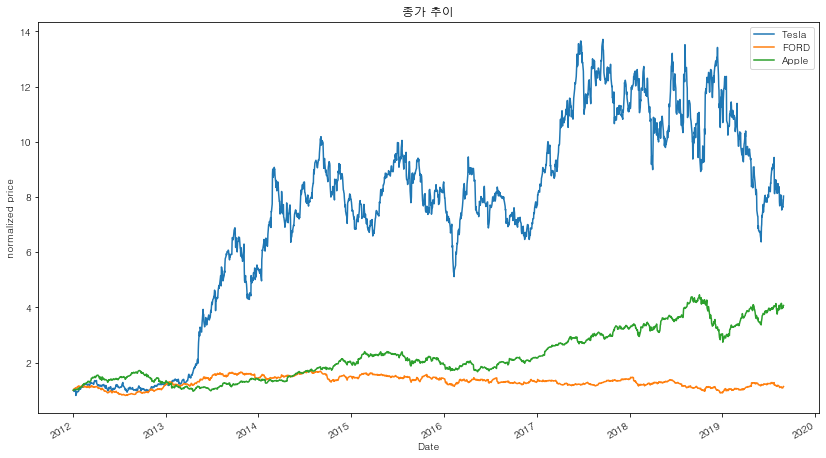

In [28]:
fig= plt.figure(figsize=(10, 8))
ax1 = plt.subplot()

tesla['norm close'].plot(ax=ax1, label='Tesla', figsize=(14, 8), title="종가 추이")
ford['norm close'].plot(ax=ax1, label='FORD')
apple['norm close'].plot(ax=ax1, label='Apple')
plt.ylabel('normalized price')
plt.legend();

## 거래대금 추이 : market 에서의 비중을 알기 위해 주가 * 거래량으로 총 거래 금액을 비교

In [29]:
tesla['total trade'] = tesla['Close'] * tesla['Volume'] 
ford['total trade'] = ford['Close'] * ford['Volume'] 
apple['total trade'] = apple['Close'] * apple['Volume'] 

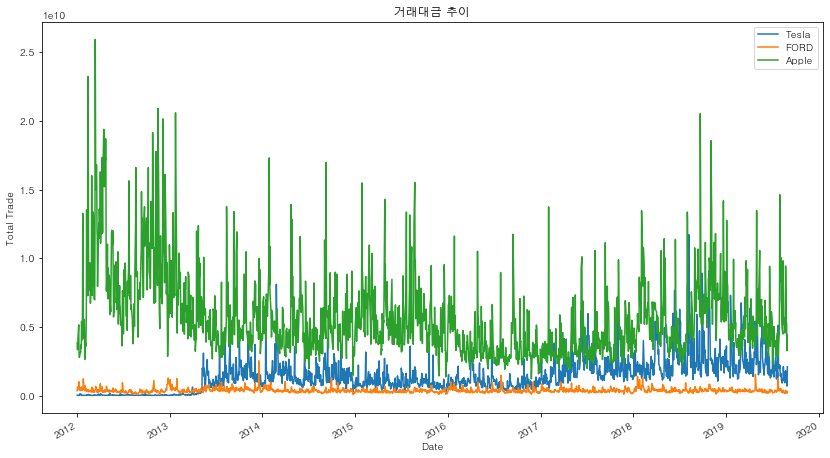

In [30]:
fig= plt.figure(figsize=(10, 8))
ax1 = plt.subplot()

tesla['total trade'].plot(ax=ax1, label='Tesla', figsize=(14, 8), title="거래대금 추이")
ford['total trade'].plot(ax=ax1, label='FORD')
apple['total trade'].plot(ax=ax1, label='Apple')
plt.ylabel('Total Trade')
plt.legend();

## 주식 종목간의 correlation 분석

- Tesla 주식이  Apple 과 관련 있는지, GM 과 관련 있는지 분석

In [31]:
from pandas.plotting import scatter_matrix

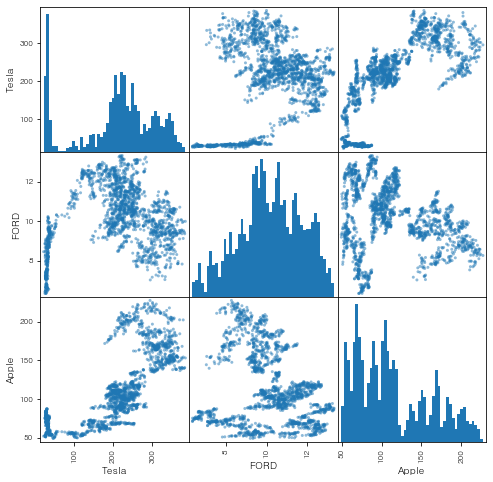

In [32]:
df = pd.concat([tesla['Close'], ford['Close'], apple['Close']], axis=1)
df.columns = ['Tesla', 'FORD', 'Apple']
scatter_matrix(df, figsize=(8, 8), hist_kwds={'bins': 50});

In [33]:
df.corr()

,Tesla,FORD,Apple
Tesla,1.000000,0.232132,0.740532
FORD,0.232132,1.000000,-0.241842
Apple,0.740532,-0.241842,1.000000


## 일일 수익율 (Daily Percentage Change)

- 주식을 구입하고 다음 날 팔았을 때의 이득 (손실)

- 주식의 변동성 분석에 유용

- 일일 수익율의 분포가 넓으면 변동성 큼

$r_t = \frac{P_t}{P_{t-1}} - 1$ 

$수익(율) = \frac{당일가격}{전일가격} - 1$

- tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1

- tesla['return'] = tesla['Close'].pct_change(1)  


- histogram 으로 얼마나 넓게 분포하는지 check

In [34]:
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1
ford['return'] = ford['Close'].pct_change(1)
apple['return'] = apple['Close'].pct_change(1)

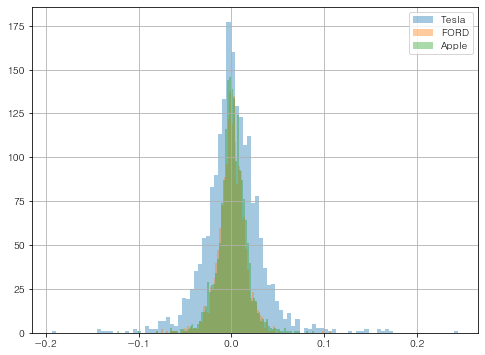

In [35]:
tesla['return'].hist(bins=100, label='Tesla', alpha=0.4, figsize=(8, 6));
ford['return'].hist(bins=100, label='FORD', alpha=0.4);
apple['return'].hist(bins=100, label='Apple', alpha=0.4);
plt.legend();

## seaborn 으로 boxplot 그리기

In [38]:
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/70/bd/5e6bf595fe6ee0f257ae49336dd180768c1ed3d7c7155b2fdf894c1c808a/seaborn-0.10.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl


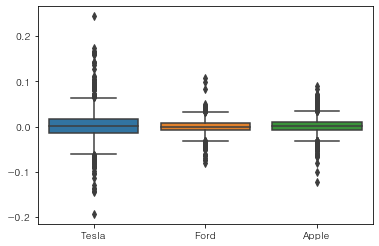

In [40]:
import seaborn as sns

df = pd.concat([tesla['return'], ford['return'], apple['return']], axis=1)
df.columns = ['Tesla', 'Ford', 'Apple']
sns.boxplot(data=df);

## daily return 간의 correlation

In [41]:
df.corr()

,Tesla,Ford,Apple
Tesla,1.000000,0.247042,0.236384
Ford,0.247042,1.000000,0.290196
Apple,0.236384,0.290196,1.000000


In [43]:
scatter_matrix?

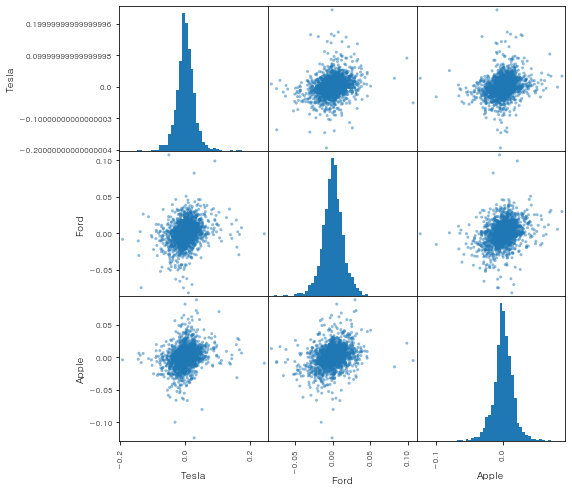

In [42]:
scatter_matrix(df, figsize=(8, 8), hist_kwds={'bins': 50});

## 누적일일수익률 (Cumulative Daily Returns)

- 1 불을 투자했을 때 누적적으로 가장 수익이 많이 났을 주식 파악

$i_t = (1+r_t) * i_{t-1}$  


$누적수익률 = (1 + 당일수익률) * 전일자 누적수익률$

In [44]:
tesla['cum ret'] = (1 + tesla['return']).cumprod()
ford['cum ret'] = (1 + ford['return']).cumprod()
apple['cum ret'] = (1 + apple['return']).cumprod()

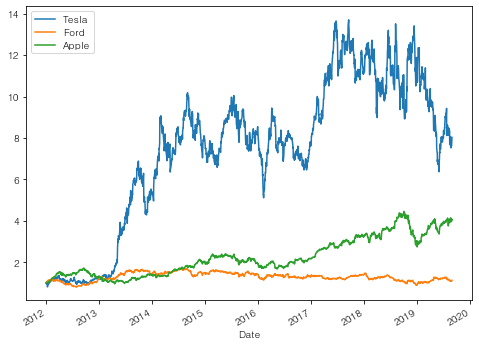

In [45]:
tesla['cum ret'].plot(label='Tesla', figsize=(8, 6))
ford['cum ret'].plot(label='Ford')
apple['cum ret'].plot(label='Apple')
plt.legend();